# P.1_2. Time series preprocessing - Dataset Electric Power Consumption ⚡

## Dataset
Dataset:  [kaggle electric-power-consumption-data-set](https://www.kaggle.com/datasets/uciml/electric-power-consumption-data-set). The dataset contains measures of electic power consumption in a single household.

## Objective
The task prepare a dataframe and save it as a .csv file. The dataframe must have rows with sliding windows for all the variables and the window size is w=5min. Thus, there must be a column for the timestamp at $t$ and a column with each variable $Z^{(i)}$ where $Z^{(i)}=\{Z^{(i)}_t, Z^{(i)}_{t-1}, Z^{(i)}_{t-2}, ..., Z^{(i)}_{t-w}\}$ and $i$ is the identifier of the variable.

Some previous techniques:
- Plot the variables, including advanced plots
- Perform a simple EDA

Check:

- Missing data
- Magnitudes of the variables
- Stationarity
- Seasonality
- Trend

## 📁 Import dataset

In [1]:
%pip install ydata_profiling --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

df = pd.read_csv('household_power_consumption.txt', sep=';')
df.head()

C:\Users\34627\AppData\Local\Temp\ipykernel_7752\1563367861.py:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('household_power_consumption.txt', sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


## 🔎 EDA (Exploratory Data Analysis)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [3]:
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

<ipython-input-46-3770ba75d88f>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


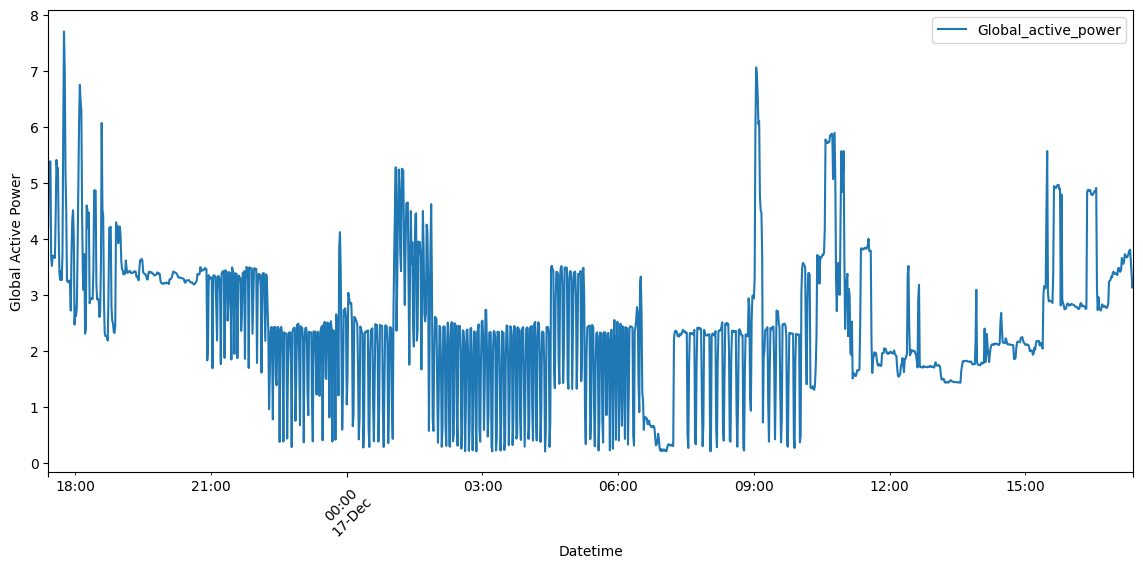

In [46]:
import pandas as pd
import matplotlib.pyplot as plt


df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

df.sort_values('datetime', inplace=True)

ax = df.iloc[:1440].plot(x='datetime', y='Global_active_power', figsize=(14, 6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


plt.xlabel('Datetime')
plt.ylabel('Global Active Power')
plt.show()

> Time series can be examined through traditional EDA techniques, with ProfileReport

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df.sample(10000))
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:01<00:00,  6.71it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# Castear tipos a float
for col in df.columns:
    if (col != 'datetime' and col != 'Date' and col != 'Time') and df[col].dtype != 'float':
        df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.dtypes)

Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
datetime                 datetime64[ns]
dtype: object


In [37]:
# Nulos
df.isna().sum()

,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979
datetime,0


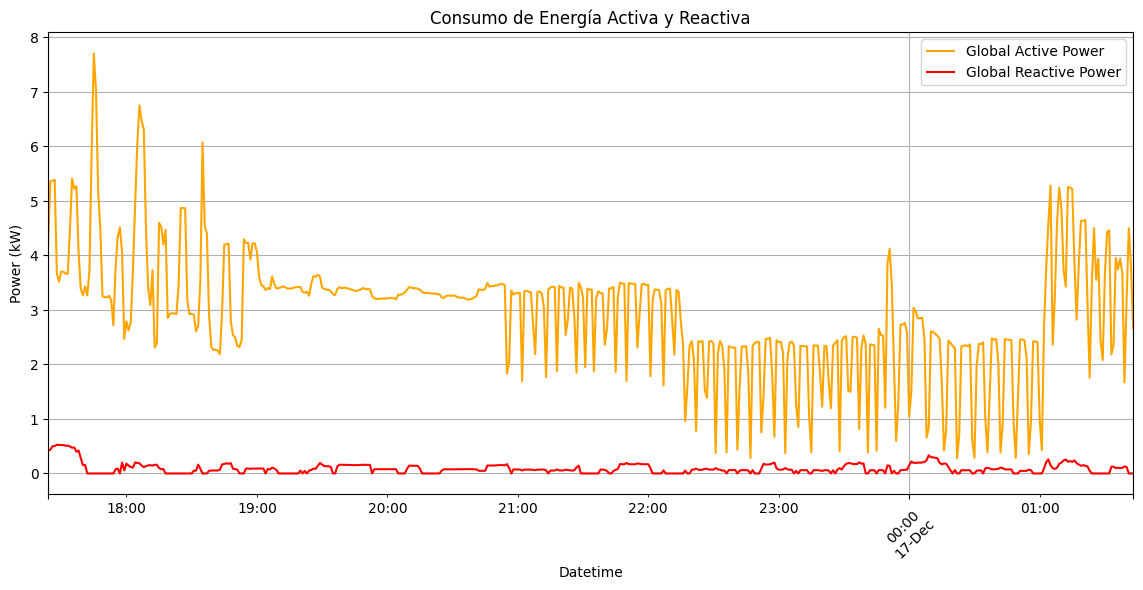

In [58]:
df[:500].plot(x='datetime', y='Global_active_power', label='Global Active Power', color='orange', ax=plt.gca(), figsize=(14,6))
df[:500].plot(x='datetime', y='Global_reactive_power', label='Global Reactive Power', color='red', ax=plt.gca())

plt.legend()
plt.xlabel('Datetime')
plt.ylabel('Power (kW)')
plt.title('Consumo de Energía Activa y Reactiva')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

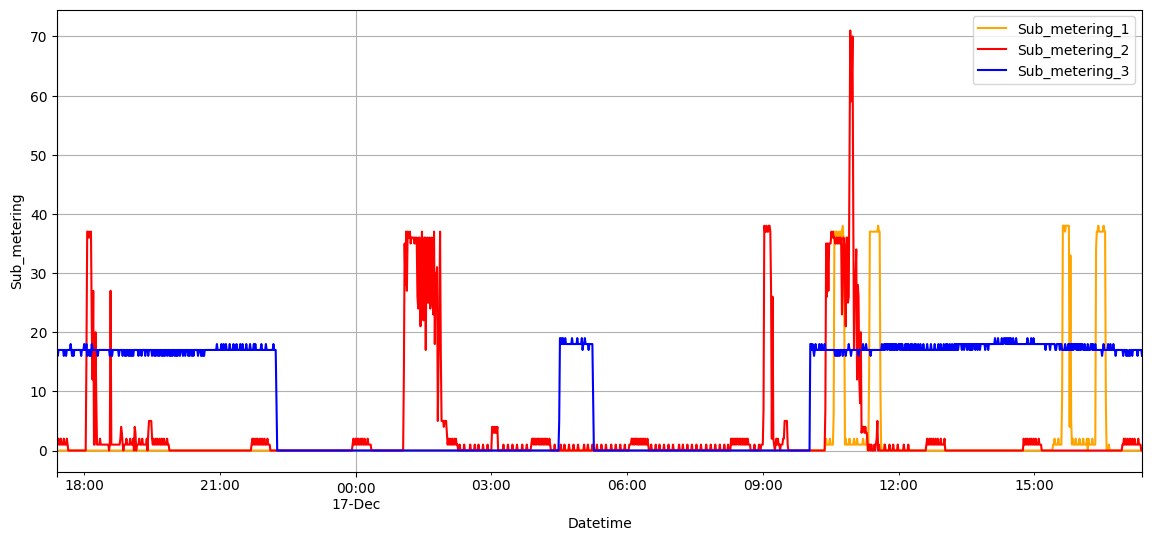

In [60]:
df[:1440].plot(x='datetime', y='Sub_metering_1', label='Sub_metering_1', color='orange',ax=plt.gca(), figsize=(14,6))
df[:1440].plot(x='datetime', y='Sub_metering_2', label='Sub_metering_2', color='red', ax=plt.gca())
df[:1440].plot(x='datetime', y='Sub_metering_3', label='Sub_metering_3', color='blue', ax=plt.gca())

plt.legend()
plt.xlabel('Datetime')
plt.ylabel('Sub_metering')
plt.grid(True)
plt.show()


> Some extra visualizations

Espaciado entre timestamps: True


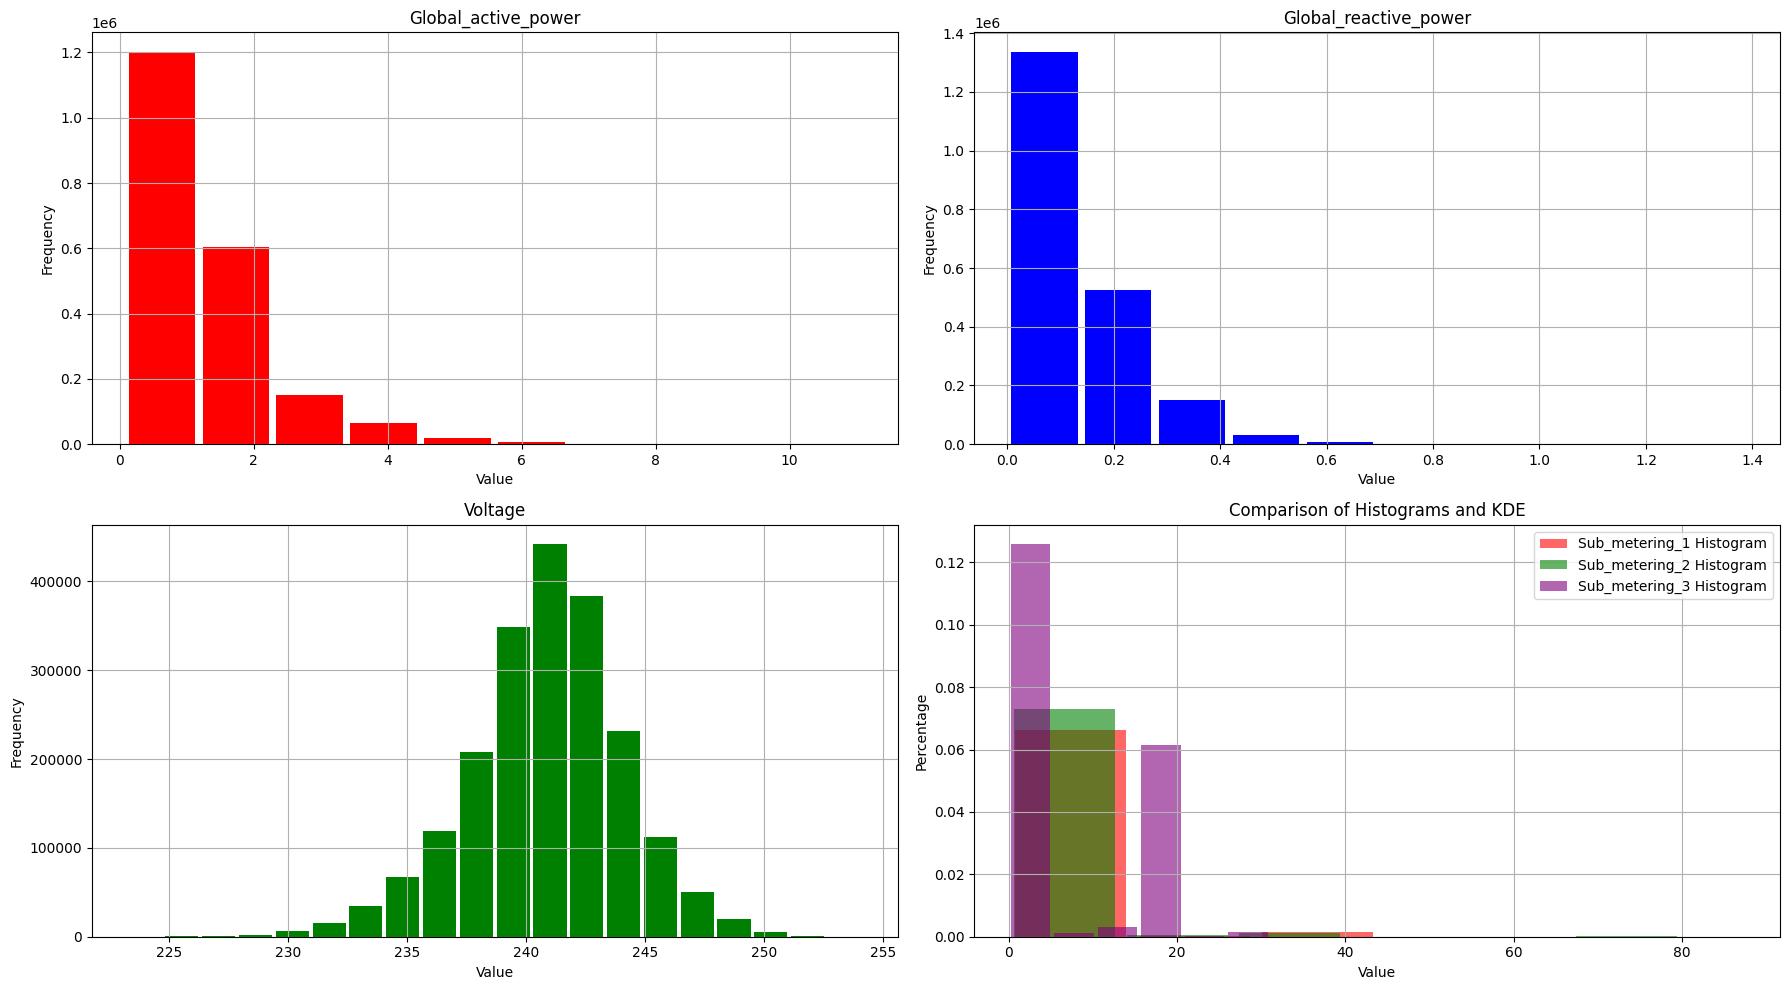

In [79]:
### Espaciado entre timestamps
import numpy as np
diff = np.diff(df.index.to_numpy())   # asumimos que el indice es datetime
Equaly_spaced = np.all(diff==diff[0]) # calculo de diferencias entre timestamps consecutivas

print(f"Espaciado entre timestamps: {Equaly_spaced}")


fig, axs = plt.subplots(2, 2, figsize=(18, 10))

# Histograms
axs[0, 0].hist(df['Global_active_power'], bins=10, color='red', rwidth=0.9)
axs[0, 0].set_title('Global_active_power')
axs[0, 0].set_xlabel('Value')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].grid(True)



axs[0, 1].hist(df['Global_reactive_power'], bins=10, color='blue', rwidth=0.9)
axs[0, 1].set_title('Global_reactive_power')
axs[0, 1].set_xlabel('Value')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].grid(True)

axs[1, 0].hist(df['Voltage'], bins=20, color='green', rwidth=0.9)
axs[1, 0].set_title('Voltage')
axs[1, 0].set_xlabel('Value')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(True)

axs[1, 1].hist(df['Sub_metering_1'], bins=6, color='red', alpha=0.6, rwidth=0.9, density=True, label='Sub_metering_1 Histogram')
axs[1, 1].hist(df['Sub_metering_2'], bins=6, color='green', alpha=0.6, rwidth=0.9, density=True, label='Sub_metering_2 Histogram')
axs[1, 1].hist(df['Sub_metering_3'], bins=6, color='purple', alpha=0.6, rwidth=0.9, density=True, label='Sub_metering_3 Histogram')

axs[1, 1].set_title('Comparison of Histograms and KDE')
axs[1, 1].set_xlabel('Value')
axs[1, 1].set_ylabel('Percentage')
axs[1, 1].legend(loc='best')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


> *Otras plots son lag plot (para estudiar la dependencia temporal de los datos) y correlation plot (relaciones lineales entre variables)*

## ❌ Missing Values
Existen 3 clases de datos faltantes:

- MCAR (Missing Completely at Random): Los datos faltantes ocurren por azar, sin relación con otras variables.

- MAR (Missing at Random): Los datos faltantes dependen de otras variables observadas, pero no de los valores faltantes en sí.

- MNAR (Missing Not at Random): Los datos faltantes dependen de los valores faltantes o de un evento relacionado.

Las técnicas para solucionar *missing values* en **MCAR** son:

1. Constant: Se reemplazan los valores faltantes con un valor constante común.
  - Problema: Generalmente distorsiona la distribución de los datos, sesgando los resultados.


2. Last Observation Carried Forward (LOCF): Se usa el último valor conocido para reemplazar los valores faltantes.
  - Problema: Puede sesgar las series temporales si son no estacionarias, ya que asume que los valores no cambian con el tiempo.

3. Next Observation Carried Backward (NOCB): Se usa el siguiente valor conocido para reemplazar los valores faltantes.
  - Problema: Presenta los mismos problemas que LOCF, ya que introduce sesgo en series no estacionarias.

4. Estadísticas (Media/Moda/Mediana): Se utiliza la media, moda o mediana de la variable para reemplazar los valores faltantes.
  - Problema: No es adecuado para variables con alta varianza, ya que puede reducir la variabilidad de los datos.

5. Estadísticas móviles: Se usa la media, moda o mediana a través de una ventana de tiempo para reemplazar los valores faltantes.
  - Problema: Ajustar el tamaño de la ventana es complicado y no es efectivo para grandes brechas de valores faltantes.

6. Interpolación lineal: Se usa una aproximación lineal de la serie temporal usando los valores conocidos.
  - Problema: Asume linealidad en las observaciones, lo cual puede no ser válido para todas las series temporales.

7. Interpolación por splines: Se usa interpolación spline utilizando polinomios para estimar los valores faltantes.
  - Problema: Asume que la variable es suave, sin muchas perturbaciones, lo que no siempre es cierto.

8. Machine Learning (knn, por ejemplo, es más costoso)

**En el caso práctico, como faltan eventos enteros, una aproximación es escoger las series temporales de años previos y copiarla en las porciones de missing values**

- *Si la serie temporal tiene una componente estacional (por ejemplo, en datos de consumo energético o climatológicos), se puede usar las tendencias y estacionalidades de los años anteriores para reemplazar los valores faltantes.
Por ejemplo, si hay un hueco de datos en un mes de diciembre de un año, se puede rellenarlo con el valor correspondiente de diciembre de los años previos.*


Cuando la serie temporal es estacionaria en el tiempo, esta técnica de elegir datos de años anteriores puede funcionar bien.



### Caso de Estudio MCAR - *no se aplica al caso real del dataset*

In [ ]:
# df.fillna(method='ffill', inplace=True)

<ipython-input-5-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


> Statistical test for stationarity. If p < 0.05. then is stationary, so we can apply LOCD

In [81]:
from statsmodels.tsa.stattools import adfuller

col = 'Global_active_power'
result = adfuller(df['Global_active_power'].loc[:1000])
p_value = result[1]
print(f"Columna: {col}, p-value: {p_value}")

col = 'Global_reactive_power'
result = adfuller(df['Global_reactive_power'].loc[:1000])
p_value = result[1]
print(f"Columna: {col}, p-value: {p_value}")

col = 'Voltage'
result = adfuller(df['Voltage'].loc[:1000])
p_value = result[1]
print(f"Columna: {col}, p-value: {p_value}")

col = 'Global_intensity'
result = adfuller(df['Global_intensity'].loc[:1000])
p_value = result[1]
print(f"Columna: {col}, p-value: {p_value}")

col = 'Sub_metering_2'
result = adfuller(df['Sub_metering_2'].loc[:1000])
p_value = result[1]
print(f"Columna: {col}, p-value: {p_value}")

col = 'Sub_metering_3'
result = adfuller(df['Sub_metering_3'].loc[:1000])
p_value = result[1]
print(f"Columna: {col}, p-value: {p_value}")

Columna: Global_active_power, p-value: 0.023052814613966167
Columna: Global_reactive_power, p-value: 3.3961163078808263e-18
Columna: Voltage, p-value: 0.3061958889889802
Columna: Global_intensity, p-value: 0.03198175010138851
Columna: Sub_metering_2, p-value: 0.004226508528277425
Columna: Sub_metering_3, p-value: 0.2389240396960649


> Solo se puede aplicar LOCD a las columnas Global active, reactive y intensity powers

In [82]:
df_copy = df.copy()

In [83]:
# Las columnas Global_active_power, Global_reactive_power y Global_intensity son estacionarias, por tanto
# relleno con LOCD: last observation

df_copy['Global_active_power'].fillna(
    df['Global_active_power'].rolling(window=100, min_periods=1).mean(),
)

df_copy['Global_reactive_power'].fillna(
    df['Global_reactive_power'].rolling(window=100, min_periods=1).mean(),
)

df_copy['Global_intensity'].fillna(
    df['Global_intensity'].rolling(window=100, min_periods=1).mean(),
)

,Global_intensity
0,18.4
1,23.0
2,23.0
3,23.0
4,15.8
...,...
2075254,4.0
2075255,4.0
2075256,3.8
2075257,3.8


> Quedan por rellenar las columnas [Voltage] y [Sub_metering_1,2,3]. En la siguiente celda se estudia la varianza y la media, para concluir si los valores nulos se pueden rellenar con estadísticas.

In [84]:
variances = df_copy[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Voltage']].var()
print(f"Varianzas: \n {variances}")

means = df[['Sub_metering_1', 'Sub_metering_2','Sub_metering_3', 'Voltage']].mean()

print(f"Medias': \n{means}")

if variances.iloc[0] > means.iloc[0]:
    print("La varianza es alta en 'Sub_metering_1'.")
else:
    print("La varianza no es tan alta en 'Sub_metering_1'.")

if variances.iloc[1] > means.iloc[1]:
    print("La varianza es alta en 'Sub_metering_2'.")
else:
    print("La varianza no es tan alta en 'Sub_metering_2'.")

if variances.iloc[2] > means.iloc[2]:
    print("La varianza es alta en 'Sub_metering_3'.")
else:
    print("La varianza no es tan alta en 'Sub_metering_3'.")

if variances.iloc[3] > means.iloc[3]:
    print("La varianza es alta en 'Voltage'.")
else:
    print("La varianza no es tan alta en 'Voltage'.")

Varianzas: 
 Sub_metering_1    37.859792
Sub_metering_2    33.895992
Sub_metering_3    71.185566
Voltage           10.497514
dtype: float64
Medias': 
Sub_metering_1      1.121923
Sub_metering_2      1.298520
Sub_metering_3      6.458447
Voltage           240.839858
dtype: float64
La varianza es alta en 'Sub_metering_1'.
La varianza es alta en 'Sub_metering_2'.
La varianza es alta en 'Sub_metering_3'.
La varianza no es tan alta en 'Voltage'.


Se rellenan los valores nulos de la columna 'Voltage' con su media

In [ ]:
mean_voltage = df['Voltage'].mean()
df['Voltage'].fillna(mean_voltage, inplace=True)
print(df['Voltage'].isnull().sum())

0


<ipython-input-49-a5e83af43f10>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Voltage'].fillna(mean_voltage, inplace=True)


> Quedarían las columnas [sub_metering_1, sub_metering_2, sub_metering_3]. Como nos encontramos en un caso de *missing values* MCAR, dejamos el caso de estudio de rellenos MCAR. En el siguiente apartado se rellenan mediante series temporales parciales de años previos.

## Caso de estudio real del dataset

In [6]:
df['Global_active_power'].isna().sum()

25979

In [7]:
df_copy = df.copy()
nan_rows = df_copy.drop(columns=['datetime', 'Time', 'Date']).isna().all(axis=1)

print(f"Numero de filas completamente vacias: {nan_rows.sum()}")

Numero de filas completamente vacias: 25979


In [115]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()

# Crear la columna con NaNs reemplazados por 12
df_copy['Global_active_power_filled'] = df_copy['Global_active_power'].fillna(12)

# Agregar la línea con los valores reemplazados
fig.add_trace(go.Scatter(x=df_copy['datetime'], y=df_copy['Global_active_power_filled'], mode='lines', name='Global_active_power', line=dict(color='blue')))

# Encontrar las filas con los valores originales NaN
missing_rows = df_copy[df_copy['Global_active_power'].isna()]

# Agregar los puntos rojos para los valores NaN que fueron reemplazados por 12
fig.add_trace(go.Scatter(x=missing_rows['datetime'], y=[12]*len(missing_rows), mode='markers', name='Missing Data (Replaced)', marker=dict(color='red', size=8)))

# Actualizar el diseño de la gráfica
fig.update_layout(title='Global Active Power with NaNs Replaced by 12 (Highlighted)',
                  xaxis_title='Datetime',
                  yaxis_title='Global Active Power',
                  template='plotly_dark')

# Mostrar la gráfica interactiva
fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
num_replaced = (df_copy['Global_active_power_filled'] == 12).sum()
num_replaced

In [9]:
import pandas as pd

nan_rows = df.drop(columns=['datetime', 'Time', 'Date']).isna().all(axis=1)

'''Se identifican bloques consecutivos de NaN. Primero, con .ne se compara el valor actual de nan_rows con el valor desplazado por shift(). Devuelve
   True cuando se produce un cambio en la secuencia.

nan_rows: [True, True, False, True, True, True, False, True]

Después de hacer el shift() = desplazamiento, tenemos:
          [NaN, True, True, False, True, True, True, False]
Después de aplicar .ne(nan_rows.shift()), obtenemos:
          [True, False, True, True, False, False, True, True]

Finalmente, aplicamos .cumsum() a la serie anterior, lo que da como resultado:
          [1, 1, 2, 3, 3, 3, 4, 5]

'''

nan_groups = nan_rows.ne(nan_rows.shift()).cumsum()

# Nos quedamos con las filas que son NaN
nan_blocks = df[nan_rows]

# Ahora, para cada grupo consecutivo, calculamos la duración en términos de la diferencia de tiempo
nan_blocks['nan_group'] = nan_groups

# Calcular la duración de cada bloque NaN
nan_durations = nan_blocks.groupby('nan_group')['datetime'].agg(['min', 'max'])

# Calculamos la duración en días o la diferencia de tiempo
nan_durations['duration'] = (nan_durations['max'] - nan_durations['min']).dt.total_seconds() / (60*60*24)  # En días

print(nan_durations.sort_values(by='duration', ascending=False).head(30))


                          min                 max  duration
nan_group                                                  
138       2010-08-17 21:02:00 2010-08-22 21:27:00  5.017361
140       2010-09-25 03:56:00 2010-09-28 19:12:00  3.636111
14        2007-04-28 00:21:00 2007-04-30 14:23:00  2.584722
100       2009-06-13 00:30:00 2009-06-15 07:34:00  2.294444
118       2010-01-12 14:53:00 2010-01-14 19:01:00  2.172222
126       2010-03-20 03:52:00 2010-03-21 13:38:00  1.406944
104       2009-08-13 05:00:00 2009-08-13 19:50:00  0.618056
32        2007-07-15 16:49:00 2007-07-15 18:11:00  0.056944
78        2008-12-10 10:48:00 2008-12-10 11:57:00  0.047917
34        2007-07-15 18:21:00 2007-07-15 19:07:00  0.031944
70        2008-10-25 10:28:00 2008-10-25 11:10:00  0.029167
84        2009-02-01 16:29:00 2009-02-01 17:06:00  0.025694
26        2007-06-09 17:59:00 2007-06-09 18:31:00  0.022222
88        2009-02-17 10:06:00 2009-02-17 10:29:00  0.015972
38        2007-08-01 08:12:00 2007-08-01

C:\Users\34627\AppData\Local\Temp\ipykernel_7752\228161743.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_blocks['nan_group'] = nan_groups


La idea es rellenar aquellos fragmentos con nulos de tiempo según un umbral. Se establece un umbral mínimo de duración 0.013, de tal modo que todas las franjas de tiempo que duren más se rellenen con la serie temporal de otro año.

```
38  2007-08-01 08:12:00 2007-08-01 08:32:00  0.013889
```



In [10]:
nan_durations = nan_durations.reset_index()

sorted_nans = nan_durations.sort_values(by='duration', ascending=False)

print(sorted_nans.iloc[14])

nan_group                     38
min          2007-08-01 08:12:00
max          2007-08-01 08:32:00
duration                0.013889
Name: 18, dtype: object


In [11]:
umbral_duracion = sorted_nans['duration'].iloc[14]
print(f"El umbral de duracion es: {umbral_duracion}")

franjas_a_sustituir = nan_durations[nan_durations['duration'] > umbral_duracion]


def fill_missing_with_nearest_year(df_copy, start_date, end_date):

    original_year = start_date.year

    filled = False
    for delta in [1, -1]:  # mismo año, el año siguiente, y el año anterior
        year_to_check = original_year + delta
        print(f"### Comprobando datos para el año {year_to_check}...")

        # rango de fechas con el año correspondiente
        start_date_with_year = start_date.replace(year=year_to_check)
        end_date_with_year = end_date.replace(year=year_to_check)

        print(f"\t### Nueva fecha inicio y fin: {start_date_with_year} y {end_date_with_year}")

        year_data = df_copy[(df_copy['datetime'] >= start_date_with_year) &
                            (df_copy['datetime'] <= end_date_with_year)]

        # hay datos completos (sin NaN) para ese rango??
        if not (year_data.isna().any().any() or start_date_with_year.year >=2011 or start_date_with_year.year <= 2005):
            print(f"\t\t### Datos completos para el año {year_to_check}. Rellenando...")

            mask = (df_copy['datetime'] >= start_date) & (df_copy['datetime'] <= end_date)
            print(f"\t\t### Mask: {mask.sum()}, longitud de máscara: {len(mask)}")

            for column in ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
                print(f"Columna: {column} - Máscara: {mask.sum()} -  Longitud de valores: {len(year_data[column].values)}")
                df_copy.loc[mask & df_copy[column].isna(), column] = year_data[column].values
            print(f"\t\t\t### Numero de valores vacios despues de Rellenar: \n{df_copy.isna().sum()}")

            print(f"\t\t### Rellenado con los datos del año {year_to_check}")
            filled = True
            break

df_copy = df.copy()

for index, row in franjas_a_sustituir.iterrows():
    start_date = row['min']
    end_date = row['max']

    print(f"##### Procesando bloque vacío: \n{row}")
    fill_missing_with_nearest_year(df_copy, start_date, end_date)
    print("-----------------------------------------------------------------------------")


El umbral de duracion es: 0.013888888888888888
##### Procesando bloque vacío: 
nan_group                     14
min          2007-04-28 00:21:00
max          2007-04-30 14:23:00
duration                2.584722
Name: 6, dtype: object
### Comprobando datos para el año 2008...
	### Nueva fecha inicio y fin: 2008-04-28 00:21:00 y 2008-04-30 14:23:00
		### Datos completos para el año 2008. Rellenando...
		### Mask: 3723, longitud de máscara: 2075259
Columna: Global_active_power - Máscara: 3723 -  Longitud de valores: 3723
Columna: Global_reactive_power - Máscara: 3723 -  Longitud de valores: 3723
Columna: Voltage - Máscara: 3723 -  Longitud de valores: 3723
Columna: Global_intensity - Máscara: 3723 -  Longitud de valores: 3723
Columna: Sub_metering_1 - Máscara: 3723 -  Longitud de valores: 3723
Columna: Sub_metering_2 - Máscara: 3723 -  Longitud de valores: 3723
Columna: Sub_metering_3 - Máscara: 3723 -  Longitud de valores: 3723
			### Numero de valores vacios despues de Rellenar: 
Date  

> Los valores nulos restantes se pueden rellenar con una mezcla de Last Observation Carried Forward con un promedio de los tres ultimos valores.

In [12]:
for column in ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
  df_copy[column].fillna(df_copy[column].rolling(window=25, min_periods=1, center=True).mean(), inplace=True)

print(f"### Numero de valores vacios despues de Rellenar: \n{df_copy.isna().sum()}")


C:\Users\34627\AppData\Local\Temp\ipykernel_7752\4293038663.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[column].fillna(df_copy[column].rolling(window=25, min_periods=1, center=True).mean(), inplace=True)


### Numero de valores vacios despues de Rellenar: 
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
datetime                 0
dtype: int64


## ➗ Sliding Window

La idea es crear un csv:





```
 #   Column                    Dtype  
---  ------                    -----  
 1   start_date                datetime
 2   end_date                  datetime
 2   Global_active_power x5    float64
 3   Global_reactive_power x5  float64
 4   Voltage x5                float64
 5   Global_intensity x5       float64
 6   Sub_metering_1 x5         float64
 7   Sub_metering_2 x5         float64
 8   Sub_metering_3 x5         float64
 9   
 ```

In [13]:
df_final = df_copy.copy().shift(5, axis=0)

In [14]:
df_final

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:53:00,0.944,0.0,238.72,4.0,0.0,0.0,0.0,2010-11-26 20:53:00
2075255,26/11/2010,20:54:00,0.946,0.0,239.31,4.0,0.0,0.0,0.0,2010-11-26 20:54:00
2075256,26/11/2010,20:55:00,0.946,0.0,239.74,4.0,0.0,0.0,0.0,2010-11-26 20:55:00
2075257,26/11/2010,20:56:00,0.942,0.0,239.41,4.0,0.0,0.0,0.0,2010-11-26 20:56:00


In [103]:
# Split timeserie into samples
def split_sequence(df, sequence_len, n_steps_out, future_steps, stride = None):

  new_rows = []
  columns = df.columns

  if stride is  None:
    stride = 1

  X, y = list(), list()
  for i in range(0, len(df), stride):
    end_ix = i + sequence_len

    out_start_ix = end_ix + future_steps
    out_end_ix = out_start_ix + n_steps_out

    if out_end_ix > len(df):
      break

    seq_x, seq_y = df[i:end_ix], df[out_start_ix:out_end_ix]

    new_row = {}

    for col in columns:
      for j in range(sequence_len):
          new_row[f'{col}_{j+1}'] = seq_x.iloc[j][col]

    for col in df.columns:
            new_row[f'{col}_y'] = seq_y.iloc[-1][col]

    print(f"row {i}")
    new_rows.append(new_row)

  new_df = pd.DataFrame(new_rows)


  return new_df


In [ ]:
prepared_df = split_sequence(df_final, 5, 1, 1, 1)

In [ ]:
import pandas as pd
import numpy as np

def split_sequence(df, sequence_len, n_steps_out, future_steps, stride=None, save_every=100_000, output_prefix="output_part"):

    if stride is None:
        stride = 1


    new_rows = []
    columns = df.columns
    file_count = 1


    for i in range(0, len(df) - sequence_len - future_steps - n_steps_out + 1, stride):
        end_ix = i + sequence_len
        out_start_ix = end_ix + future_steps
        out_end_ix = out_start_ix + n_steps_out

        if out_end_ix > len(df):
            break


        seq_x = df.iloc[i:end_ix]
        seq_y = df.iloc[out_start_ix:out_end_ix]


        new_row = {}

        for col in columns:
            for j in range(sequence_len):
                new_row[f'{col}_{j+1}'] = seq_x.iloc[j][col]


        for col in columns:
            new_row[f'{col}_y'] = seq_y.iloc[-1][col]

        new_rows.append(new_row)

        # Guardamos cada 100,000 filas
        if len(new_rows) >= save_every:
            chunk_df = pd.DataFrame(new_rows)
            chunk_filename = f"{output_prefix}_{file_count}.csv"
            chunk_df.to_csv(chunk_filename, index=False)
            print(f"Guardado: {chunk_filename}")
            file_count += 1
            new_rows = []  # Reiniciamos la lista para la siguiente tanda

    if len(new_rows) > 0:
        chunk_df = pd.DataFrame(new_rows)
        chunk_filename = f"{output_prefix}_{file_count}.csv"
        chunk_df.to_csv(chunk_filename, index=False)
        print(f"Guardado: {chunk_filename}")

    print("Proceso completado")

new_df = split_sequence(df, sequence_len=5, n_steps_out=1, future_steps=1)


Guardado: output_part_1.csv
Guardado: output_part_2.csv
Guardado: output_part_3.csv
Guardado: output_part_4.csv
Guardado: output_part_5.csv
Guardado: output_part_6.csv
Guardado: output_part_7.csv
Guardado: output_part_8.csv
Guardado: output_part_9.csv
Guardado: output_part_10.csv
Guardado: output_part_11.csv
Guardado: output_part_12.csv
Guardado: output_part_13.csv
Guardado: output_part_14.csv
Guardado: output_part_15.csv
Guardado: output_part_16.csv
Guardado: output_part_17.csv
Guardado: output_part_18.csv
Guardado: output_part_19.csv
Guardado: output_part_20.csv
Guardado: output_part_21.csv
Proceso completado


In [ ]:
file_names = [f"output_part_{i}.csv" for i in range(1, 22)]
combined_csv = pd.concat([pd.read_csv(file) for file in file_names])
combined_csv.to_csv("output_combined.csv", index=False)

print("Archivo combinado guardado como 'output_combined.csv'")


Archivo combinado guardado como 'output_combined.csv'
